# Cat anh mask -> gt.png
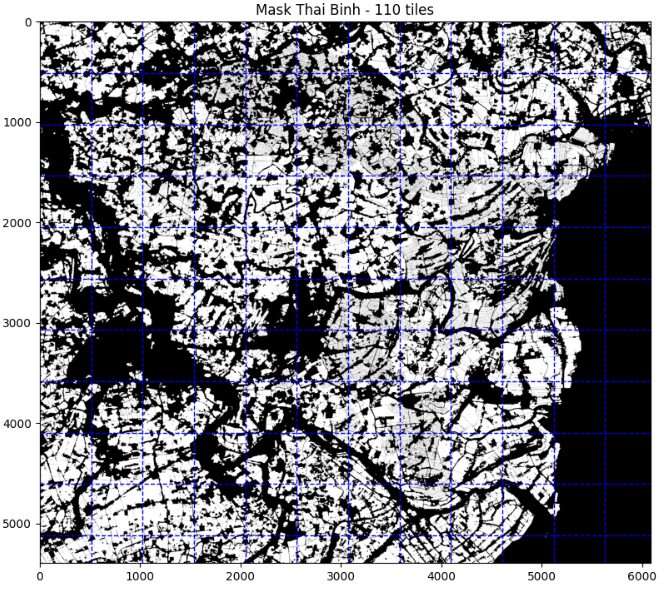

In [16]:
from PIL import Image
import numpy as np

# Bước 1: Đọc ảnh TIF ban đầu
input_path = "dataset_x/sentinel2_data/VN60111/VN60111_B06_2024_05_01_2024_11_01_S2/VN60111_B06_2024_05_01_2024_11_01_S2_Image2.tif"  # Đường dẫn ảnh TIF ban đầu
img = Image.open(input_path)

# Lấy kích thước ảnh
width, height = img.size

# Bước 2: Tạo ảnh grayscale với giá trị (0, 1)
# Ma trận ngẫu nhiên với giá trị giữa 0 và 1
grayscale_data = np.random.rand(height, width).astype(np.float32)

# Bước 3: Chuyển ma trận thành ảnh và lưu lại
output_image = Image.fromarray((grayscale_data).astype(np.uint8))  # Chuyển sang thang 0-255 để lưu
output_path = "grayscale_image.tif"  # Đường dẫn lưu ảnh
output_image.save(output_path, format="TIFF")

print(f"Đã tạo ảnh TIF grayscale tại: {output_path}")


Đã tạo ảnh TIF grayscale tại: grayscale_image.tif


In [18]:
import os
from PIL import Image

def split_image(input_image_path, output_folder, tile_size=512):
    image = Image.open(input_image_path)
    width, height = image.size

    for i in range(0, height, tile_size):
        for j in range(0, width, tile_size):
            box = (j, i, min(j + tile_size, width), min(i + tile_size, height))
            tile = image.crop(box)

            tile_folder = os.path.join(output_folder, f"VN60111_{i // tile_size}_{j // tile_size}")
            os.makedirs(tile_folder, exist_ok=True)
            tile_path = os.path.join(tile_folder, "gt.png")
            tile.save(tile_path, format="PNG")


            if tile.size[0] < tile_size or tile.size[1] < tile_size:
                os.remove(tile_path)

input_image_path = 'grayscale_image.tif'  
output_folder = "dataset_x/datasets/crop_type"  

# Thực hiện cắt ảnh
split_image(input_image_path, output_folder)


# Cat anh tif cac ngay -> tci.png

In [4]:
import os
import rasterio
from rasterio.windows import Window
import numpy as np

def process_tif_folder(input_folder, output_folder, tile_size=512):
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".tif"):

            input_file_path = os.path.join(input_folder, file_name)
            
            day = file_name.split("_")[-1].replace(".tif", "")
            
            with rasterio.open(input_file_path) as src:
                width, height = src.width, src.height

                for i in range(0, height, tile_size):
                    for j in range(0, width, tile_size):
                        window = Window(j, i, tile_size, tile_size)
                        transform = src.window_transform(window)

                        tile = src.read(window=window)
                        
                        tile_height, tile_width = tile.shape[1], tile.shape[2]
                        if tile_height < tile_size or tile_width < tile_size:
                            # Nếu tile nhỏ hơn 512x512, bỏ qua
                            continue

                        tile_folder = os.path.join(output_folder, f"VN60111_{i // tile_size}_{j // tile_size}", "images", day)
                        os.makedirs(tile_folder, exist_ok=True)

                        # Lưu tile với tên "tci.png"
                        output_tile_path = os.path.join(tile_folder, "tci.png")
                        with rasterio.open(
                            output_tile_path,
                            "w",
                            driver="PNG",
                            height=tile.shape[1],
                            width=tile.shape[2],
                            count=tile.shape[0],
                            dtype=tile.dtype,
                            crs=src.crs,
                            transform=transform,
                        ) as dst:
                            dst.write(tile)
                            
                        if tile_height < tile_size or tile_width < tile_size:
                            os.remove(tile_folder)
                        
                        
                        # print(count)

input_folder = "dataset_x/sentinel2_data/VN60111/VN60111_TCI_2024_05_01_2024_11_01_S2"  
print(f"Input folder: {input_folder}")  
output_folder = "dataset_x/datasets/crop_type"  

# Thực hiện xử lý
process_tif_folder(input_folder, output_folder)


Input folder: dataset_x/sentinel2_data/VN60111/VN60111_TCI_2024_05_01_2024_11_01_S2


# Cat anh tif cac ngay -> b08.png

In [2]:
name = 'VN115_B11_2024_05_01_2024_11_01_S2_Image1.tif'
day = name.split("_")[0].replace(".tif", "")
png_name = f"{day}.png"
png_name


'VN115.png'

In [11]:
import os
import rasterio
from rasterio.windows import Window
import numpy as np

def process_tif_folder(input_folder, output_folder, tile_size=512):
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".tif"):

            input_file_path = os.path.join(input_folder, file_name)
            
            #fdsfsdfds
            day = file_name.split("_")[-1].replace(".tif", "")
            band = file_name.split("_")[-9].replace(".tif", "")[-2:]
            folder_head = file_name.split("_")[0].replace(".tif", "")
            png_name = f"b{band}.png"
            
            with rasterio.open(input_file_path) as src:
                width, height = src.width, src.height

                for i in range(0, height, tile_size):
                    for j in range(0, width, tile_size):
                        window = Window(j, i, tile_size, tile_size)
                        transform = src.window_transform(window)

                        tile = src.read(window=window)
                        
                        tile_height, tile_width = tile.shape[1], tile.shape[2]
                        if tile_height < tile_size or tile_width < tile_size:
                            # Nếu tile nhỏ hơn 512x512, bỏ qua
                            continue

                        # Process each band: clip(band/32, 0, 255) and convert to 8-bit
                        # tile = np.clip(tile / 32, 0, 255).astype(np.uint8)

                        tile_folder = os.path.join(output_folder, f"{folder_head}_{i // tile_size}_{j // tile_size}", "images", day)
                        os.makedirs(tile_folder, exist_ok=True)

                        # Lưu tile với tên "b08.png"
                        output_tile_path = os.path.join(tile_folder, png_name)
                        with rasterio.open(
                            output_tile_path,
                            "w",
                            driver="PNG",
                            height=tile.shape[1],
                            width=tile.shape[2],
                            count=tile.shape[0],  # Assuming one band per file
                            dtype=tile.dtype,
                            crs=src.crs,
                            transform=transform,
                        ) as dst:
                            dst.write(tile)
                            
                        if tile_height < tile_size or tile_width < tile_size:
                            os.remove(tile_folder)
                        
                        
                        # print(count)

input_folder = "dataset_x/sentinel2_data/VN60111/VN60111_B12_2024_05_01_2024_11_01_S2"  
print(f"Input folder: {input_folder}")  
output_folder = "dataset_x/datasets/crop_type"  

# Thực hiện xử lý
process_tif_folder(input_folder, output_folder)


Input folder: dataset_x/sentinel2_data/VN60111/VN60111_B12_2024_05_01_2024_11_01_S2


# Chia train/test/val

In [14]:
import os
import random
import json

def split_dataset(parent_dir, output_dir, train_ratio=0, test_ratio=1, val_ratio=0):
    # Get all subfolder names in the specified folder
    subfolders = [name for name in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, name))]
    
    # Shuffle the subfolder list
    random.shuffle(subfolders)
    
    # Calculate split indices
    total = len(subfolders)
    train_end = int(total * train_ratio)
    test_end = train_end + int(total * test_ratio)
    
    # Split into train, test, val
    train = subfolders[:train_end]
    test = subfolders[train_end:test_end]
    val = subfolders[test_end:]
    
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Write each split to its own JSON file
    # train_json_path = os.path.join(output_dir, 'train.json')
    test_json_path = os.path.join(output_dir, 'vn60111.json')
    # val_json_path = os.path.join(output_dir, 'val.json')
    
    # with open(train_json_path, 'w') as train_file:
    #     json.dump({"train": train}, train_file, indent=4)
    
    with open(test_json_path, 'w') as test_file:
        json.dump({"test": test}, test_file, indent=4)
    
    # with open(val_json_path, 'w') as val_file:
    #     json.dump({"val": val}, val_file, indent=4)
    
    print(f"Dataset split completed.")
    # print(f"Train JSON saved to {train_json_path}")
    print(f"Test JSON saved to {test_json_path}")
    # print(f"Val JSON saved to {val_json_path}")

# Define the parent directory and output directory
parent_dir = 'dataset_x/datasets/crop_type/VN60111'
output_dir = 'dataset_x/splits/rice'

# Split the dataset
split_dataset(parent_dir, output_dir)


Dataset split completed.
Test JSON saved to dataset_x/splits/rice/vn60111.json


In [ ]:
import satlas.util
import torchvision
import json 
import torch 
import skimage.io
import satlas.model.model
import satlas.model.evaluate
import numpy as np
import tqdm
from PIL import Image, ImageDraw, ImageFont
import os
import torchvision
import cv2
from osgeo import gdal
from skimage.measure import find_contours
import satlaspretrain_models
import rasterio
from rasterio.windows import Window
from collections import OrderedDict


config_path = 'dataset_x/configs/swinb_mi_rgb_rice.txt'
weights_path = 'dataset_x/output_weights/ricex/best.pth'

image_path = 'stack.npy'

# Read config and initialize the model.
with open(config_path, 'r') as f:
    config = json.load(f)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
for spec in config['Tasks']:
    if 'Task' not in spec:
        spec['Task'] = satlas.model.dataset.tasks[spec['Name']]
model = satlas.model.model.Model({
    'config': config['Model'],
    'channels': config['Channels'],
    'tasks': config['Tasks'],
    # 'class_mask' : config['Tasks']['ClassMask']
})
print(model)


state_dict = torch.load(weights_path, map_location=device)
cleaned_state_dict = OrderedDict(
    (key.replace('module.', ''), value) for key, value in state_dict['model_state_dict'].items()
)
model.load_state_dict(cleaned_state_dict)
# model.load_state_dict(state_dict)
model.to(device)
model.eval()

aggregation backbone: underlying=swin op=max image_channels=3 groups=[[0, 1, 2, 3, 4, 5, 6, 7]]
backbone_channels: [(1, 128), [4, 128], [8, 128], [16, 128], [32, 128]]
Model(
  (backbone): AggregationBackbone(
    (backbone): SwinBackbone(
      (backbone): SwinTransformer(
        (features): Sequential(
          (0): Sequential(
            (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
            (1): Permute()
            (2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          )
          (1): Sequential(
            (0): SwinTransformerBlockV2(
              (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attn): ShiftedWindowAttentionV2(
                (qkv): Linear(in_features=128, out_features=384, bias=True)
                (proj): Linear(in_features=128, out_features=128, bias=True)
                (cpb_mlp): Sequential(
                  (0): Linear(in_features=2, out_features=512, bias=True)
                  (1): ReLU(in

/tmp/ipykernel_29116/1424393736.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(weights_path, map_location=device)


Model(
  (backbone): AggregationBackbone(
    (backbone): SwinBackbone(
      (backbone): SwinTransformer(
        (features): Sequential(
          (0): Sequential(
            (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
            (1): Permute()
            (2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          )
          (1): Sequential(
            (0): SwinTransformerBlockV2(
              (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attn): ShiftedWindowAttentionV2(
                (qkv): Linear(in_features=128, out_features=384, bias=True)
                (proj): Linear(in_features=128, out_features=128, bias=True)
                (cpb_mlp): Sequential(
                  (0): Linear(in_features=2, out_features=512, bias=True)
                  (1): ReLU(inplace=True)
                  (2): Linear(in_features=512, out_features=4, bias=False)
                )
              )
              (stochastic_depth): StochasticDep

: 

In [43]:
import torch

# Đường dẫn tới file .pth của bạn
# pth_path = "/mnt/data2tb/TungCT/ekGIS/tungct/tung_work/gee/satlas/dataset_x/output_weights/rice_ms/last.pth"  # Thay bằng tên file của bạn
pth_path = '/mnt/data2tb/TungCT/ekGIS/tungct/tung_work/gee/satlas/dataset_x/output_weights/rice_ms/last.pth'
# Tải nội dung file .pth
checkpoint = torch.load(pth_path, map_location=torch.device('cpu'))  # map_location để load lên CPU nếu GPU không có

# Kiểm tra các khóa chính trong checkpoint
print("Keys in the checkpoint:")
print(checkpoint.keys())

# Nếu trọng số mô hình được lưu trong 'state_dict':
if 'model_state_dict' in checkpoint:
    print("\nModel state_dict keys:")
    print(checkpoint['model_state_dict'].keys())

# Nếu optimizer được lưu
if 'optimizer' in checkpoint:
    print("\nOptimizer state_dict keys:")
    print(checkpoint['optimizer'].keys())

# Nếu lưu thêm thông tin epoch
if 'epoch' in checkpoint:
    print(f"\nEpoch saved: {checkpoint['epoch']}\nEpoch sum saved: {checkpoint['summary_epoch']}\nTrainLoss: {checkpoint['train_loss']}\nValLoss: {checkpoint['val_loss']}\nBest: {checkpoint['best_score']}")

# Nếu có thêm thông tin khác, in toàn bộ checkpoint
print("\nFull checkpoint content:")
for key, value in checkpoint.items():
    print(f"{key}: {type(value)}")  # Loại dữ liệu (vd: dict, int, list, tensor)
    if isinstance(value, (int, float, str)):
        print(f"    Value: {value}")  # Giá trị trực tiếp nếu là kiểu đơn giản


Keys in the checkpoint:
dict_keys(['model_state_dict', 'epoch', 'summary_epoch', 'train_loss', 'train_task_losses', 'val_loss', 'val_task_losses', 'val_score', 'best_score', 'val_scores', 'scaler_state_dict', 'eval_time - summary_prev_time', 'time - eval_time', 'optimizer.param_groups[0][lr]'])

Model state_dict keys:
odict_keys(['backbone.backbone.backbone.features.0.0.weight', 'backbone.backbone.backbone.features.0.0.bias', 'backbone.backbone.backbone.features.0.2.weight', 'backbone.backbone.backbone.features.0.2.bias', 'backbone.backbone.backbone.features.1.0.norm1.weight', 'backbone.backbone.backbone.features.1.0.norm1.bias', 'backbone.backbone.backbone.features.1.0.attn.logit_scale', 'backbone.backbone.backbone.features.1.0.attn.relative_coords_table', 'backbone.backbone.backbone.features.1.0.attn.relative_position_index', 'backbone.backbone.backbone.features.1.0.attn.qkv.weight', 'backbone.backbone.backbone.features.1.0.attn.qkv.bias', 'backbone.backbone.backbone.features.1.0.att

/tmp/ipykernel_3513/3224566095.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(pth_path, map_location=torch.device('cpu'))  # map_location để loa

# Stack 8 anh tif

## RGB

In [13]:
# gop 8 anh tif
import glob
import os
import subprocess

# channels = ['B08', 'TCI', 'B05', 'B06', 'B07', 'B11', 'B12']
channels = ['B08']
path = 'dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8'
fnames = glob.glob(f'{path}/*.tif')
subprocess.call([
    'gdal_merge.py',
    '-o', 'dataset_x/results/stack_thaibinh_msb08.tif',
    # Keep bands separate in output file.
    '-separate',
] + fnames)

0...10...20...30...40...50...60...70...80...90...100 - done.


0

## Multispectral


In [19]:
import glob
import os
import subprocess

channels = ['B08', 'TCI', 'B05', 'B06', 'B07', 'B11', 'B12']
fnames = []
for scene_name in os.listdir('dataset_x/sentinel2_data/VN10709'): # folder luu data
    image_fnames = glob.glob(os.path.join('dataset_x/sentinel2_data/VN10709/VN10709_*/VN10709_*/*.tif'.format(scene_name)))
    channel_to_fname = {fname.split('_')[-9].split('.')[0]: fname for fname in image_fnames}
    selected_fnames = [channel_to_fname[channel] for channel in channels]
    #selected_fnames = channel_to_fname['TCI']
    fnames.extend(selected_fnames)
    print(f"selected: {len(fnames)}")
# subprocess.call([
#     'gdal_merge.py',
#     '-o', 'dataset_x/results/stack_thaibinh_ms.tif',
#     # Keep bands separate in output file.
#     '-separate',
# ] + fnames)

selected: {'TCI': 'dataset_x/sentinel2_data/VN115_05_2024_11_2024_S2-20241218T042705Z-001/VN115_05_2024_11_2024_S2/VN115_05_2024_11_2024_S2_TCI_Image2.tif', 'B08': 'dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8/VN115_05_2024_12_2024_S2_B08_Image3.tif'}
selected: {'TCI': 'dataset_x/sentinel2_data/VN115_05_2024_11_2024_S2-20241218T042705Z-001/VN115_05_2024_11_2024_S2/VN115_05_2024_11_2024_S2_TCI_Image2.tif', 'B08': 'dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8/VN115_05_2024_12_2024_S2_B08_Image3.tif'}
selected: {'TCI': 'dataset_x/sentinel2_data/VN115_05_2024_11_2024_S2-20241218T042705Z-001/VN115_05_2024_11_2024_S2/VN115_05_2024_11_2024_S2_TCI_Image2.tif', 'B08': 'dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8/VN115_05_2024_12_2024_S2_B08_Image3.tif'}
selected: {'TCI': 'dataset_x/sentinel2_data/VN115_05_2024_11_2024_S2-2024

0

In [12]:
import glob
import os
import subprocess

channels = ['B08']
# path = 'dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8'
# fnames = glob.glob(f'{path}/*.tif')
# fnames
# subprocess.call([
#     'gdal_merge.py',
#     '-o', 'dataset_x/results/stack_thaibinh_b08.tif',
#     # Keep bands separate in output file.
#     '-separate',
# ] + fnames)
#channels = ['TCI']
# fnames = []
# dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8
for scene_name in os.listdir('dataset_x/sentinel2_data'): # folder luu data
    image_fnames = glob.glob(os.path.join('dataset_x/sentinel2_data/VN115_*/VN115_*/*.tif'.format(scene_name)))
    channel_to_fname = {file_name.split("_")[-2].replace(".tif", ""): file_name for file_name in image_fnames}
    # channel_to_fname = {fname.split('_')[-1].split('.')[0]: fname for fname in image_fnames}
    selected_fnames = [channel_to_fname[channel] for channel in channels]
    #selected_fnames = channel_to_fname['TCI']
    fnames.extend(selected_fnames)
    print(f"selected: {fnames}")
subprocess.call([
    'gdal_merge.py',
    '-o', 'dataset_x/results/stack_thaibinh_msb8.tif',
    # Keep bands separate in output file.
    '-separate',
] + fnames)

selected: ['dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8/VN115_05_2024_12_2024_S2_B08_Image6.tif', 'dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8/VN115_05_2024_12_2024_S2_B08_Image1.tif', 'dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8/VN115_05_2024_12_2024_S2_B08_Image2.tif', 'dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8/VN115_05_2024_12_2024_S2_B08_Image7.tif', 'dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8/VN115_05_2024_12_2024_S2_B08_Image8.tif', 'dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8/VN115_05_2024_12_2024_S2_B08_Image4.tif', 'dataset_x/sentinel2_data/VN115_05_2024_12_2024_S2_B8-20241223T023011Z-001/VN115_05_2024_12_2024_S2_B8/VN115_05_2024_12

0

# Cat anh tif stack -> tif chay inference

In [19]:
# cat anh tif stack luu lai vao kq
import rasterio
from rasterio.windows import Window
import os

input_folder = "dataset_x/sentinel2_data/VN60111/VN60111_B05_2024_05_01_2024_11_01_S2/xxx"
output_folder = "dataset_x/sentinel2_data/VN60111/VN60111_B05_2024_05_01_2024_11_01_S2/xxx"

os.makedirs(output_folder, exist_ok=True)

# test_folder = ["VN115_7_9", "VN115_2_5", "VN115_6_8", "VN115_6_2", "VN115_0_3"]

def process_tif_folder(input_folder, output_folder, tile_size=512):
    for file_name in os.listdir(input_folder):
        if file_name.endswith(".tif"):

            input_file_path = os.path.join(input_folder, file_name)
            
            day = file_name.split("_")[-1].replace(".tif", "")
            
            with rasterio.open(input_file_path) as src:
                width, height = src.width, src.height

                for i in range(0, height, tile_size):
                    for j in range(0, width, tile_size):
                        window = Window(j, i, tile_size, tile_size)
                        transform = src.window_transform(window)

                        tile = src.read(window=window)
                        
                        tile_height, tile_width = tile.shape[1], tile.shape[2]
                        if tile_height < tile_size or tile_width < tile_size:
                            # Nếu tile nhỏ hơn 512x512, bỏ qua
                            continue

                        tile_folder = os.path.join(output_folder, f"VN60111_{i // tile_size}_{j // tile_size}", "images", day)
                        os.makedirs(tile_folder, exist_ok=True)

                        # Lưu tile với tên "tci.png"
                        output_tile_path = os.path.join(tile_folder, "infer.tif")
                        with rasterio.open(
                            output_tile_path,
                            "w",
                            driver="GTiff",
                            height=tile.shape[1],
                            width=tile.shape[2],
                            count=tile.shape[0],
                            dtype=tile.dtype,
                            crs=src.crs,
                            transform=transform,
                        ) as dst:
                            dst.write(tile)
                            
                        if tile_height < tile_size or tile_width < tile_size:
                            os.remove(tile_folder)
                        
                        
                        # print(count)
# Thực hiện xử lý
process_tif_folder(input_folder, output_folder)
